## Notebook for Duration-Intensity-Area plot, frequency, and intensity distributions

In [1]:
import dask
import pandas as pd
import xarray as xr
import numpy as np
import dask.array as da
import warnings
warnings.filterwarnings('ignore')
from datetime import date
import math
#plotting libraries
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
#sns.set_theme(style="white")

print('loaded libraries')

loaded libraries


In [2]:
#load data
dir_path = "/pub/hfdrake/datasets/CM4_MHW_blobs/"
mt_path = "/pub/mariant3/WarmWaterMasses/notebooks/02_mhw_metrics/"
manso = pd.read_pickle(f"{mt_path}/data_ocetrac-labels/01860503-01901020_mhw-metrics-region.pkl")
#manso = pd.read_pickle(f"{mt_path}/data_ocetrac-labels/01860503-01901020_mhw-metrics-global.pkl")
blobs = xr.open_dataset(f"{mt_path}/data_ocetrac-labels/01860503-01901020_ocetrac-labels-region.nc")
labels = blobs.blobs

In [3]:
area_list_manso = [event_area.sum() for event_area in manso.area.values]
area_list = [event_area.sum() for event_area in manso.area.values]
intensity_list_manso = [(event_maxint.max()-29) for event_maxint in manso.intensity_max.values]
manso['max_intensity_max'] = intensity_list_manso
manso['cumulative_area']= area_list

In [4]:
#quick-fix for are displayed in duration-intensity-area plot
area_rounded = [25000000094208,50000000188416,75000002379776,100000000376832,124999998373888]

for i in range(len(area_rounded)):
    area_rounded[i] = "{:.1e}".format(area_rounded[i])

In [5]:
event_label = 25
mhw25 = manso.loc[manso.id==event_label]#.date.values[-1]

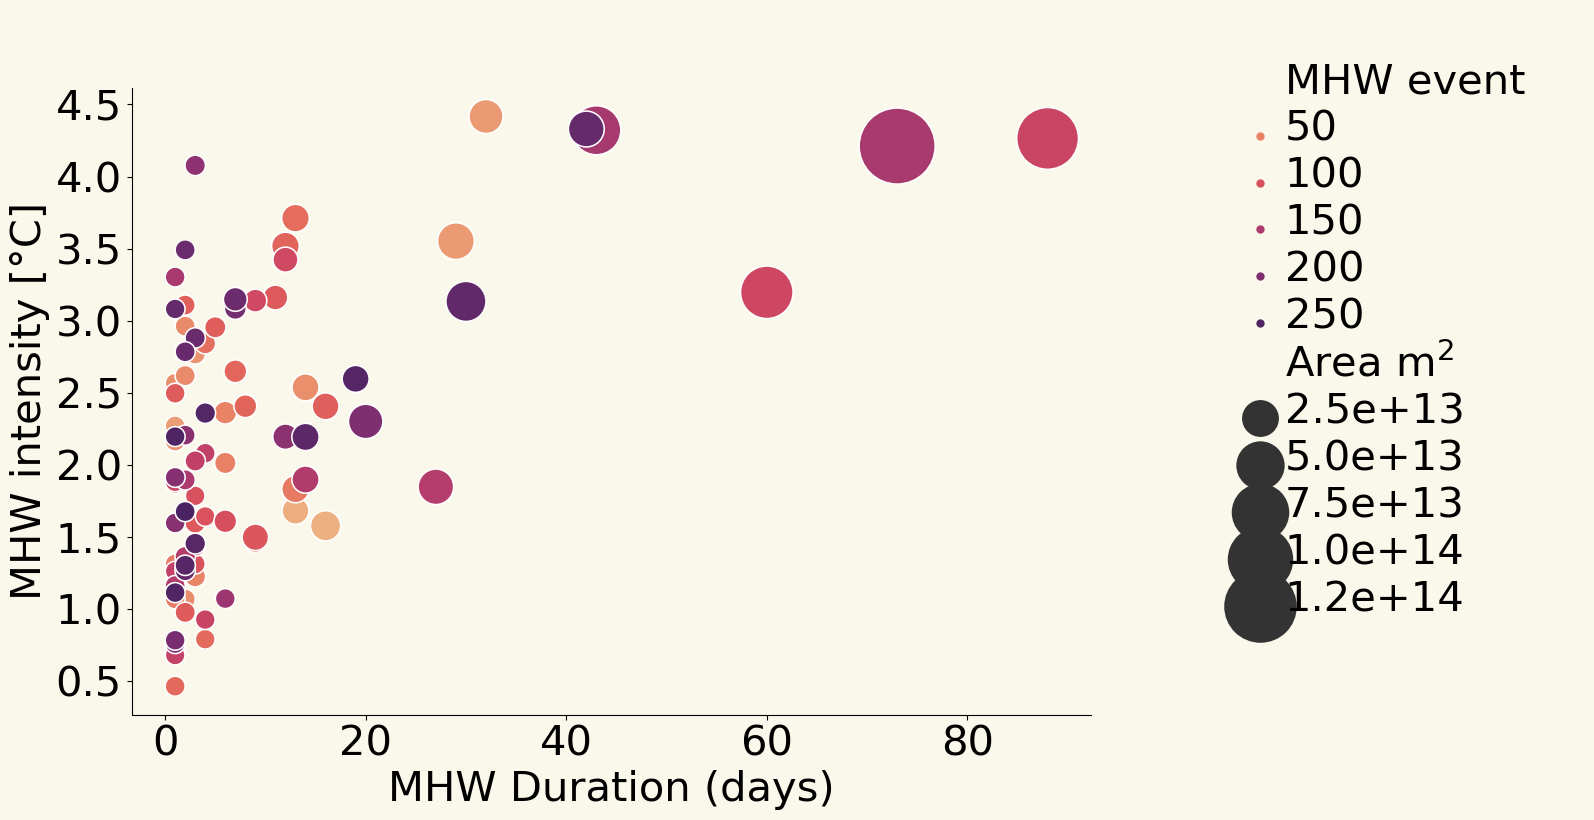

In [6]:
#height=8, aspect=2,
ax = sns.relplot(
    data=manso, x="duration", y="max_intensity_max",
    size="cumulative_area",hue="id", sizes=(200,3000),height=7,aspect=1.5,
    palette='flare')

ax.fig.set_facecolor('#faf8eb')

ax.set_axis_labels('MHW Duration (days)', 'MHW intensity [°C]', fontsize=30)

for label in ax.legend.texts:
    label.set_fontsize(30)
    if label.get_text() == "id":
        label.set_text(r"MHW event")
    if label.get_text() == "cumulative_area":
        label.set_text(r"Area $\mathrm{{m^2}}$")
    if label.get_text() == "25000000094208":
        label.set_text(r'2.5e+13')
    if label.get_text() == "50000000188416":
        label.set_text(f'{area_rounded[1]}')
    if label.get_text() == "75000002379776":
        label.set_text(f'{area_rounded[2]}')
    if label.get_text() == "100000000376832":
        label.set_text(f'{area_rounded[3]}')
    if label.get_text() == "124999998373888":
        label.set_text(f'{area_rounded[4]}')
        
for text in ax.ax.xaxis.get_ticklabels():
    text.set_fontsize(30)
for text in ax.ax.yaxis.get_ticklabels():
    text.set_fontsize(30)

ax._legend.set_bbox_to_anchor((1, 1.1)) #((0.9, 1.1))
ax._legend.set_loc('upper left')

ax.ax.set_facecolor('#faf8eb')
#ax.savefig('/pub/mariant3/WarmWaterMasses/figures/mhw_metrics/mhw-duration-intensity-area-30f-TALK.png')

#ax._legend.set_borderaxespad(0.)

#plt.show()

In [7]:
manso['rounded_area'] = np.round(manso.cumulative_area.values)

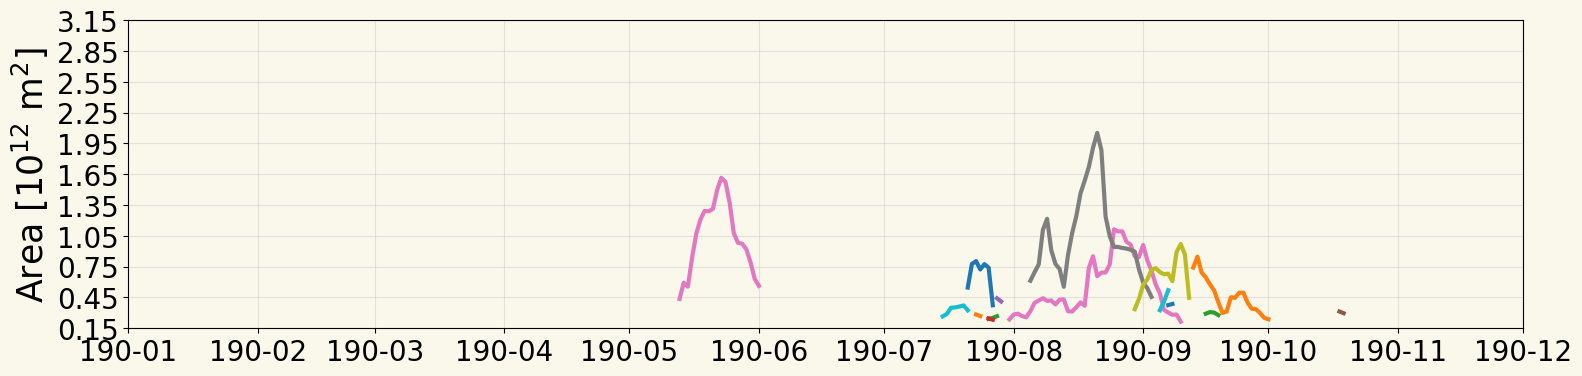

In [8]:
fontsize=20
fig, ax = plt.subplots(figsize=(18, 4))
fig.set_facecolor('#faf8eb')

year = '0190-01'
yearend = '0190-12'

for i in range(len(manso['area'].values)):
    ax.plot(manso.date[i], manso.area[i], label=f'MHW {manso.id[i]}', linewidth=3)
    ax.set_xlim(np.datetime64(f'{year}'), np.datetime64(f'{yearend}'))#np.datetime64('0186-10-20'))
    ax.set_ylim(0.15e+12, 1.4e+12) #0.22e+12  3.3e+12
    #ax.legend(loc='center left', bbox_to_anchor=(1, 0.5),fontsize=30)

#ax.set_xlabel('Time', fontsize=30)
ax.set_ylabel(r"Area [10$^{12}$ m${^2}$]", fontsize=25)
ax.tick_params(axis='x', labelsize=fontsize)
ax.tick_params(axis='y', labelsize=fontsize)

ax.set_yticks(np.arange(0.15e+12, 3e+12 + 0.3e+12, 0.3e+12)) #(0.15e+12, 3e+12 + 0.3e+12, 0.3e+12)) (0.15e+12, 1.4e+12 + 0.3e+12, 0.3e+12))
ax.set_facecolor('#faf8eb')

# Customize y-tick labels
# yticks = ax.get_yticks()
# yticks_labels = [f'{int(y/1e12)}e12' for y in yticks]
# ax.set_yticklabels(yticks_labels)

# Change the color of the offset text
offset_text = ax.yaxis.get_offset_text()
offset_text.set_fontsize(1)
offset_text.set_color('w')
plt.grid(True, alpha=0.3)

#plt.savefig(f'/pub/mariant3/WarmWaterMasses/figures/mhw-area-{year}-large-talk.png', bbox_inches='tight')

plt.show()

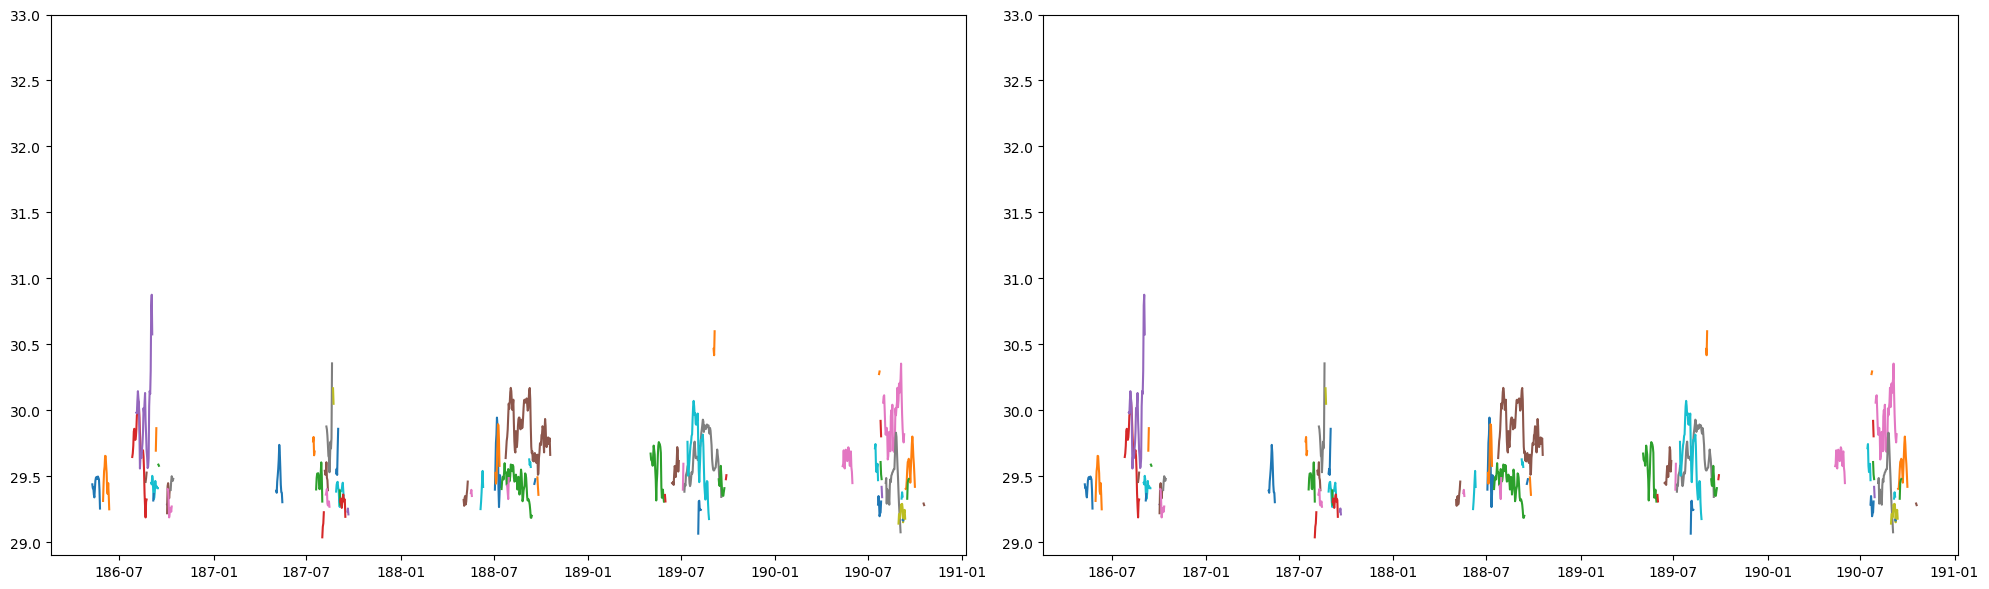

In [9]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
for i in range(len(manso['intensity_mean'].values)):
    plt.plot(manso.date[i], manso.intensity_mean[i])
    plt.ylim(28.9,33)

plt.subplot(1,2,2)
for i in range(len(manso['intensity_mean'].values)):
    plt.plot(manso.date[i], manso.intensity_mean[i])
    plt.ylim(28.9,33)

plt.tight_layout()
plt.show()

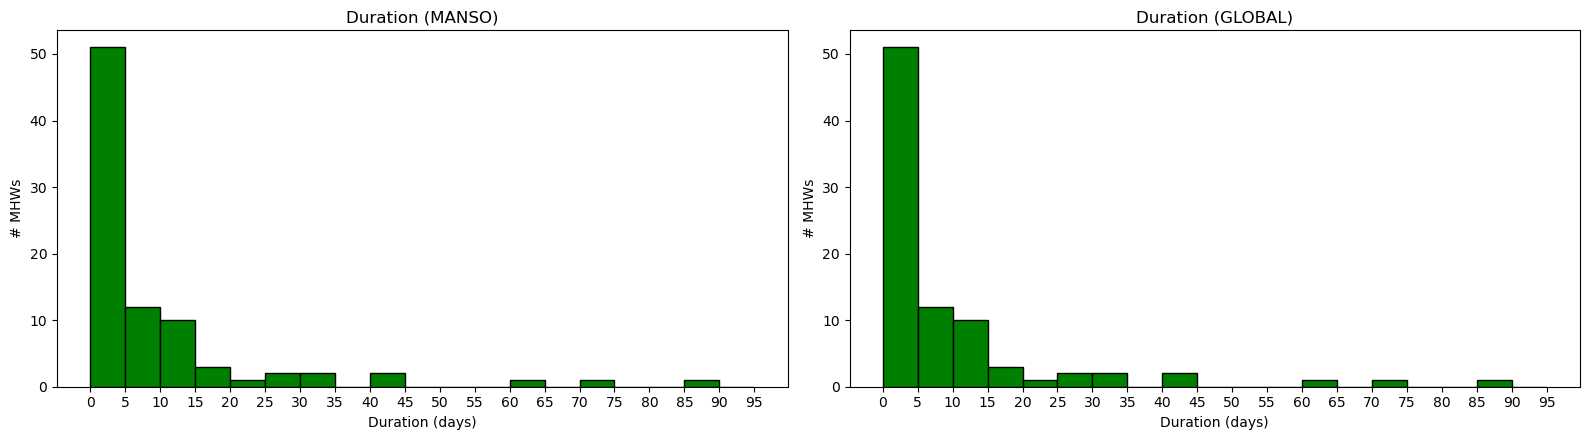

In [10]:
plt.figure(figsize=(16, 4.5))
plt.subplot(1,2,1)
mansoname= 'MANSO'
n_bin_max = np.max(manso.duration)+10
n_bins = np.arange(0, n_bin_max, 5) #dtype=int
manso.duration.hist(color = "g", ec="k",lw=1, bins=n_bins)
plt.grid(visible=None)
plt.xticks(n_bins)
plt.ylabel('# MHWs')
plt.xlabel('Duration (days)')
plt.title(f'Duration ({mansoname})')


plt.subplot(1,2,2)
mansoname= 'GLOBAL'
n_bin_max = np.max(manso.duration)+10
n_bins = np.arange(0, n_bin_max, 5) #dtype=int
manso.duration.hist(color = "g", ec="k",lw=1, bins=n_bins)
plt.grid(visible=None)
plt.xticks(n_bins)
plt.ylabel('# MHWs')
plt.xlabel('Duration (days)')
plt.title(f'Duration ({mansoname})')


plt.tight_layout()
plt.show()

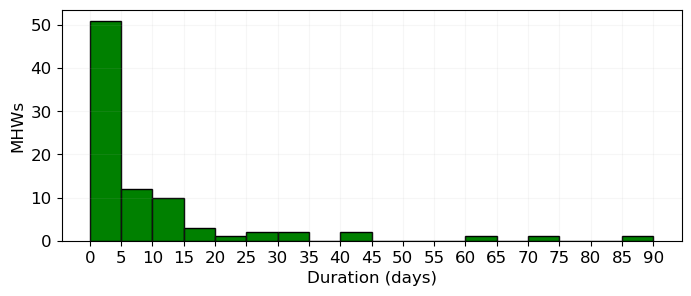

In [11]:
plt.figure(figsize=(8,3))
#plt.subplot(1,2,1)
mansoname= 'MANSO'
n_bin_max = np.max(manso.duration)+5
n_bins = np.arange(0, n_bin_max, 5) #dtype=int
manso.duration.hist(color = "g", ec="k",lw=1, bins=n_bins,xlabelsize=12,ylabelsize=12)
plt.grid(visible=None)
plt.xticks(n_bins)
plt.ylabel('MHWs',fontsize=12)
plt.xlabel('Duration (days)',fontsize=12)
plt.grid(True, alpha=0.1)
#plt.savefig('/pub/mariant3/WarmWaterMasses/figures/mhw-duration-paper.png', bbox_inches='tight')
#plt.title(f'Duration ({mansoname})',fontsize=12)


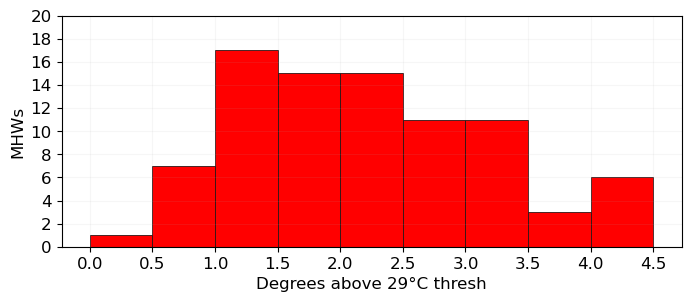

In [12]:
max_intensity_global = []
for i in range(len(manso['intensity_max'].values)):
    max_intensity_global += [np.max(manso['intensity_max'].values[i]) - 29]
max_bin_int_g = math.ceil(np.max(max_intensity_global))
#print(max_bin_int_g)

max_intensity_manso = []
for i in range(len(manso['intensity_max'].values)):
    max_intensity_manso += [np.max(manso['intensity_max'].values[i]) - 29]

plt.figure(figsize=(8,3))

bins_int=np.arange(0, max_bin_int_g, 0.5)
plt.hist(max_intensity_manso, color = "red", ec="k",lw=.5, bins=bins_int)
plt.xticks(bins_int,fontsize=12)
plt.yticks(np.arange(0,21,2),fontsize=12)
#plt.title(f'Max Int ({mansoname})')
plt.ylabel('MHWs',fontsize=12)
plt.xlabel('Degrees above 29°C thresh',fontsize=12)
plt.grid(True, alpha=0.1)
#plt.savefig('/pub/mariant3/WarmWaterMasses/figures/mhw-intensity-paper.png', bbox_inches='tight')

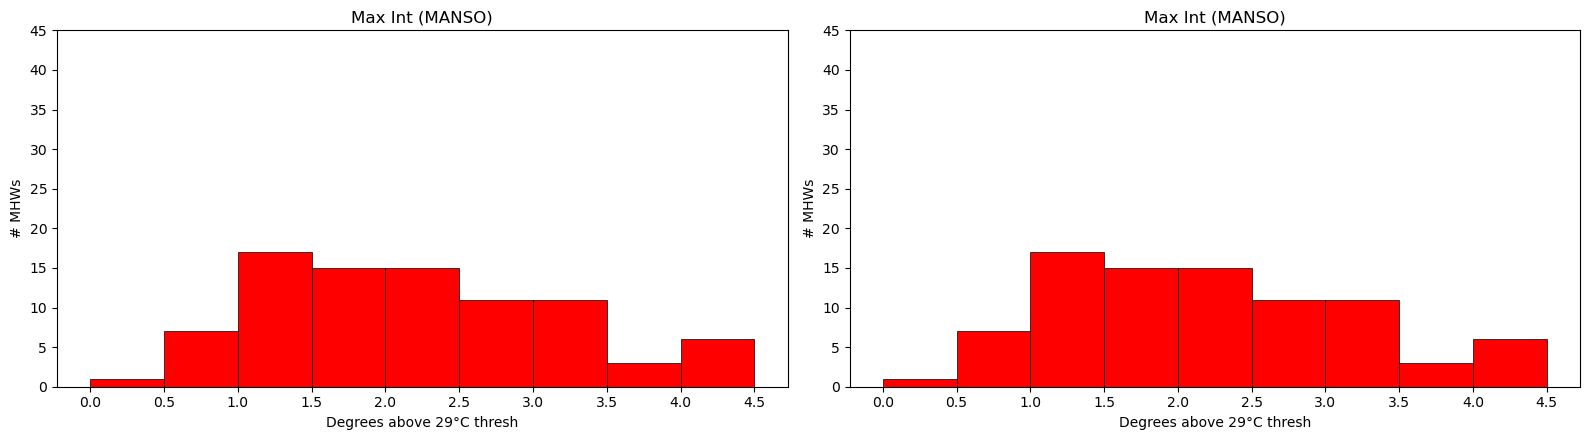

In [13]:
max_intensity_global = []
for i in range(len(manso['intensity_max'].values)):
    max_intensity_global += [np.max(manso['intensity_max'].values[i]) - 29]
max_bin_int_g = math.ceil(np.max(max_intensity_global))

max_intensity_manso = []
for i in range(len(manso['intensity_max'].values)):
    max_intensity_manso += [np.max(manso['intensity_max'].values[i]) - 29]

plt.figure(figsize=(16, 4.5))
plt.subplot(1,2,1)
bins_int=np.arange(0, max_bin_int_g, 0.5)
plt.hist(max_intensity_manso, color = "red", ec="k",lw=.5, bins=bins_int)
plt.xticks(bins_int)
plt.yticks(np.arange(0,50,5))
plt.title(f'Max Int ({mansoname})')
plt.ylabel('# MHWs')
plt.xlabel('Degrees above 29°C thresh')


plt.subplot(1,2,2)
plt.hist(max_intensity_global, color = "red", ec="k",lw=.5, bins=bins_int)
plt.xticks(bins_int)
plt.yticks(np.arange(0,50,5))
plt.title(f'Max Int ({mansoname})')
plt.ylabel('# MHWs')
plt.xlabel('Degrees above 29°C thresh')


plt.tight_layout()
plt.show()

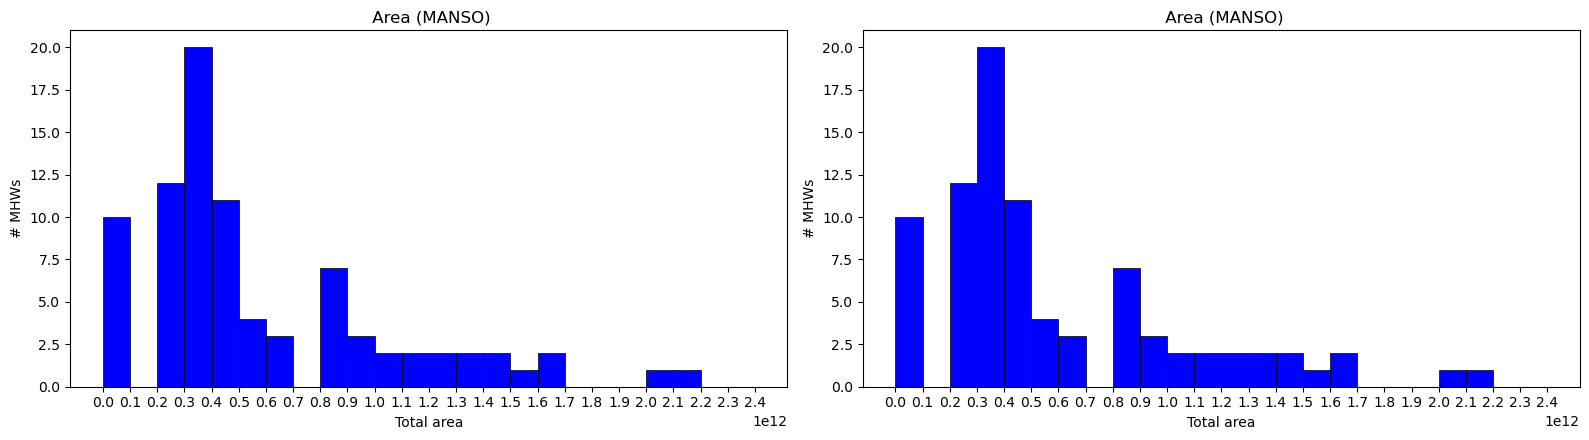

In [14]:
areaplot_global = []
for i in range(len(manso['intensity_max'].values)):
    areaplot_global += [np.max(manso['area'].values[i])]
bins_area_manso= np.arange(0,2e13,1e12)

areaplot_manso = []
for i in range(len(manso['intensity_max'].values)):
    areaplot_manso += [np.max(manso['area'].values[i])]
bins_area_manso= np.arange(0,2.5e12,1e11)

plt.figure(figsize=(16, 4.5))
plt.subplot(1,2,1)
plt.hist(areaplot_global, color = "blue", ec="k",lw=.5,bins=bins_area_manso)
plt.xticks(bins_area_manso)
plt.title(f' Area ({mansoname})')
plt.ylabel('# MHWs')
plt.xlabel('Total area')

plt.subplot(1,2,2)
plt.hist(areaplot_manso, color = "blue", ec="k",lw=.5, bins=bins_area_manso)
plt.xticks(bins_area_manso)
plt.title(f' Area ({mansoname})')
plt.ylabel('# MHWs')
plt.xlabel('Total area')


plt.tight_layout()
plt.show()

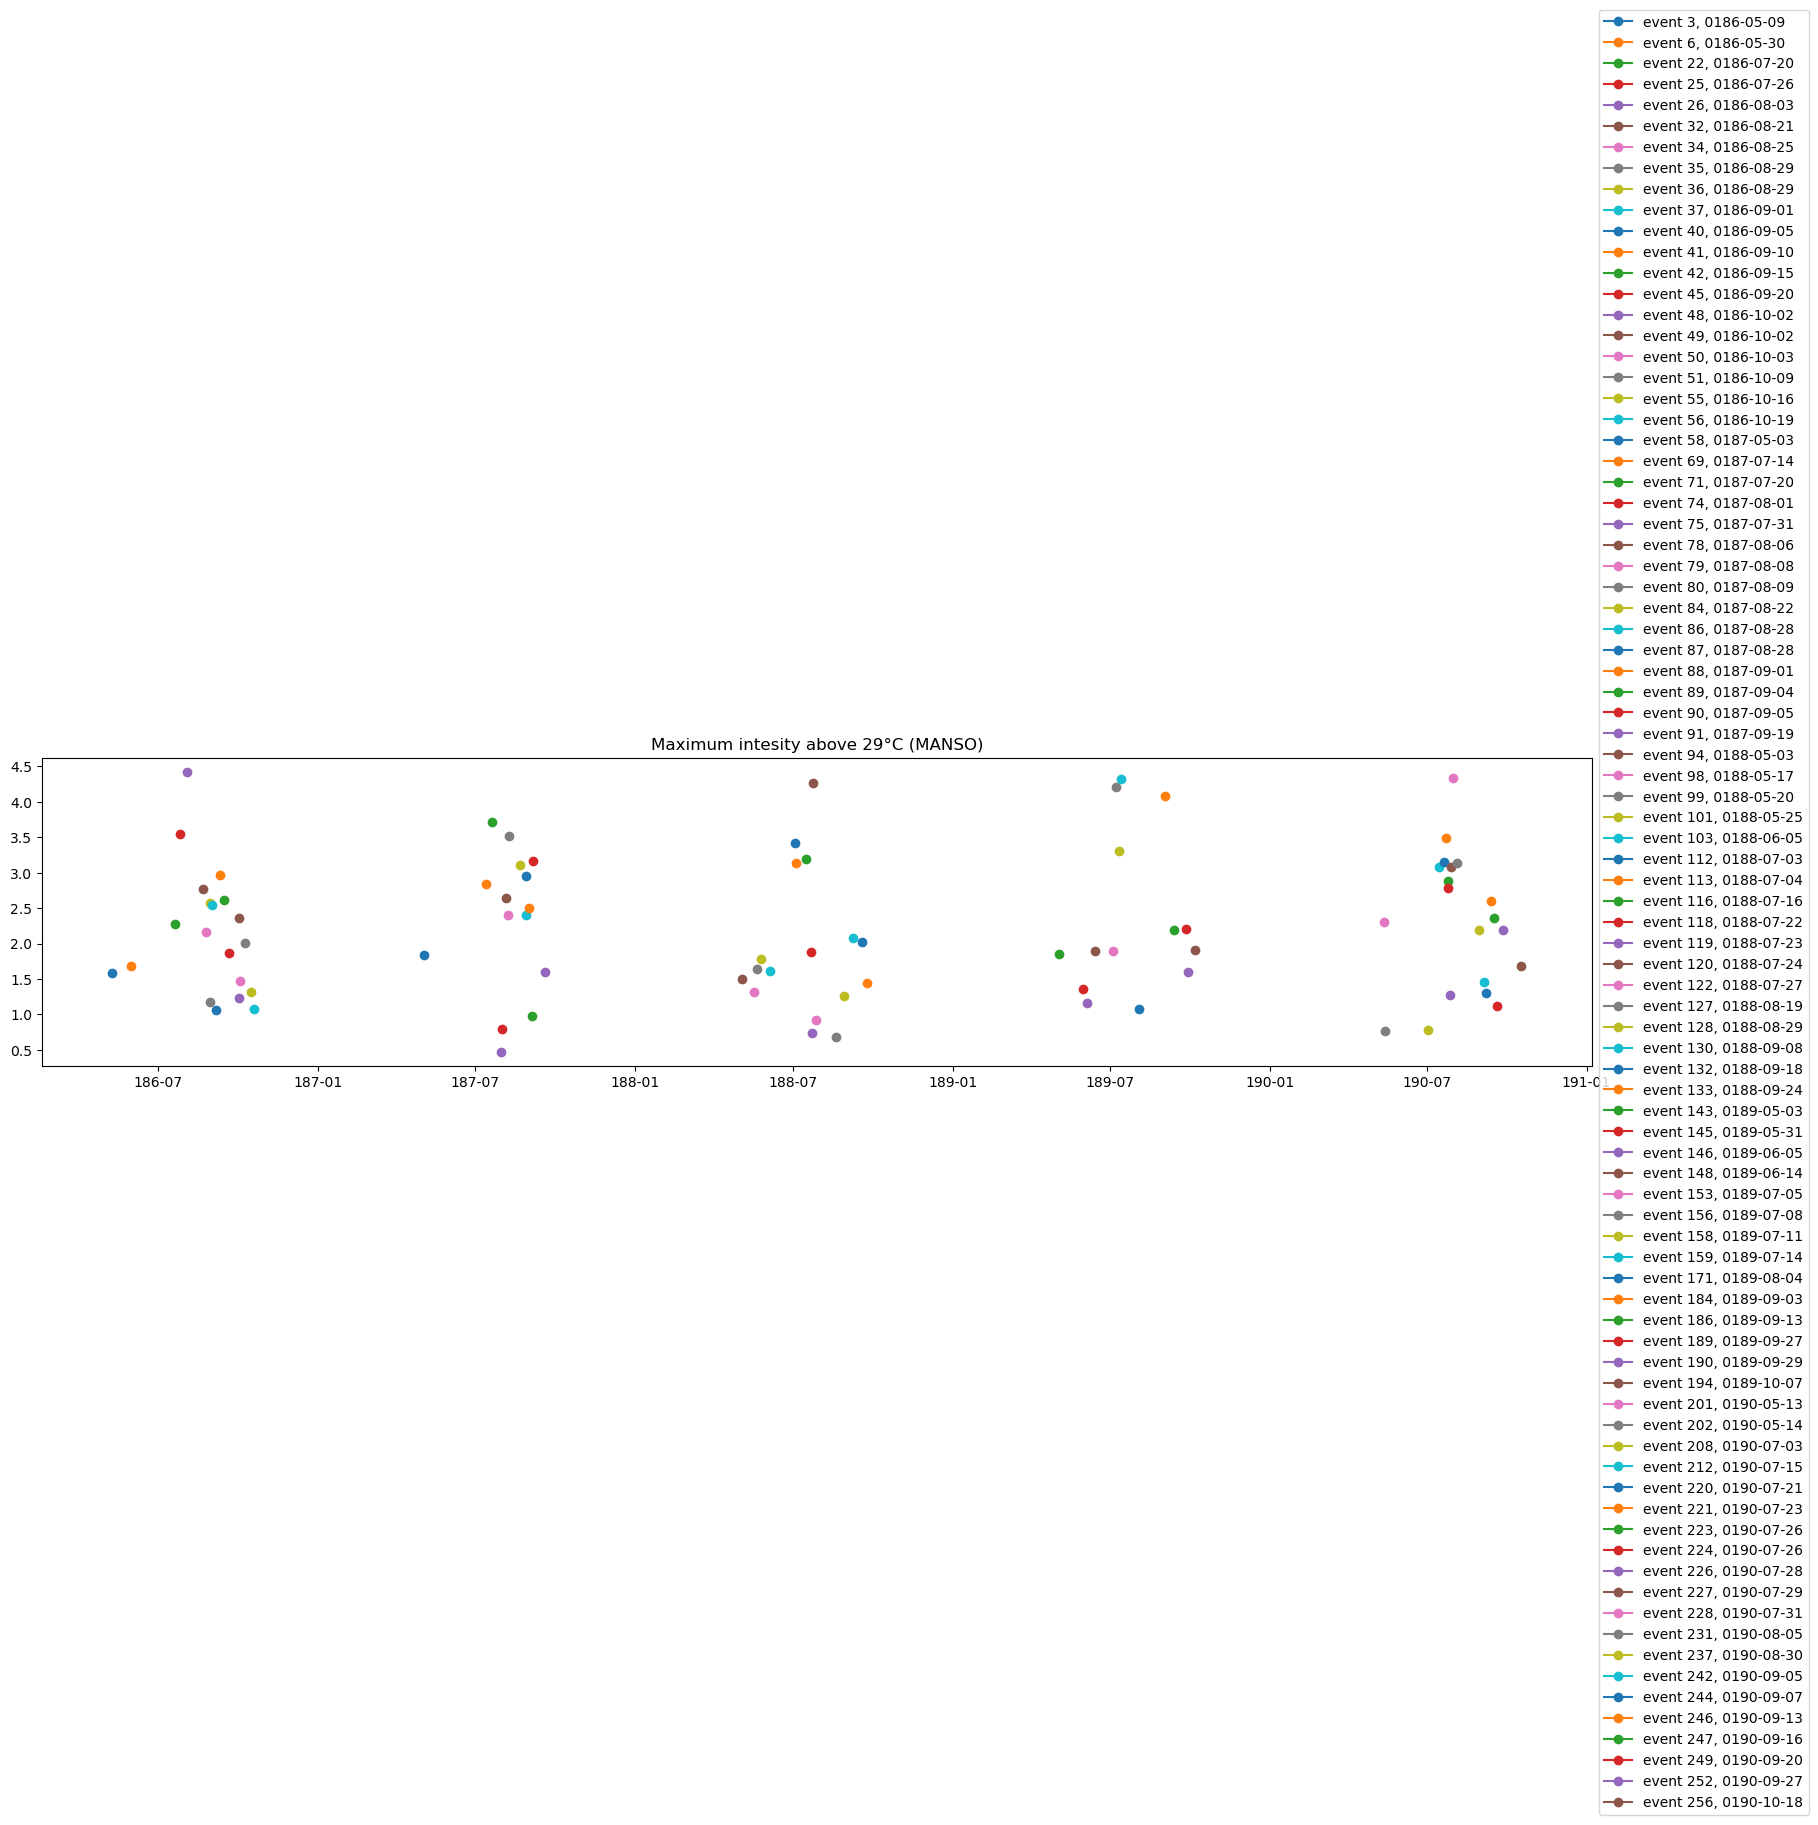

In [15]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(20, 4))

# Generate a colormap based on the number of data points
cmap = plt.get_cmap('tab20b')
colors = cmap(np.linspace(0, 1, len(manso['intensity_mean'].values)))

# Plot each point with a different color from the colormap
for i in range(len(manso['intensity_mean'].values)):
    plt.plot(manso.date[i][0], max_intensity_manso[i], marker='o', label=f'event {manso.id[i]}, {manso.date[i][0]}')

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title(f'Maximum intesity above 29°C ({mansoname})')
plt.show()


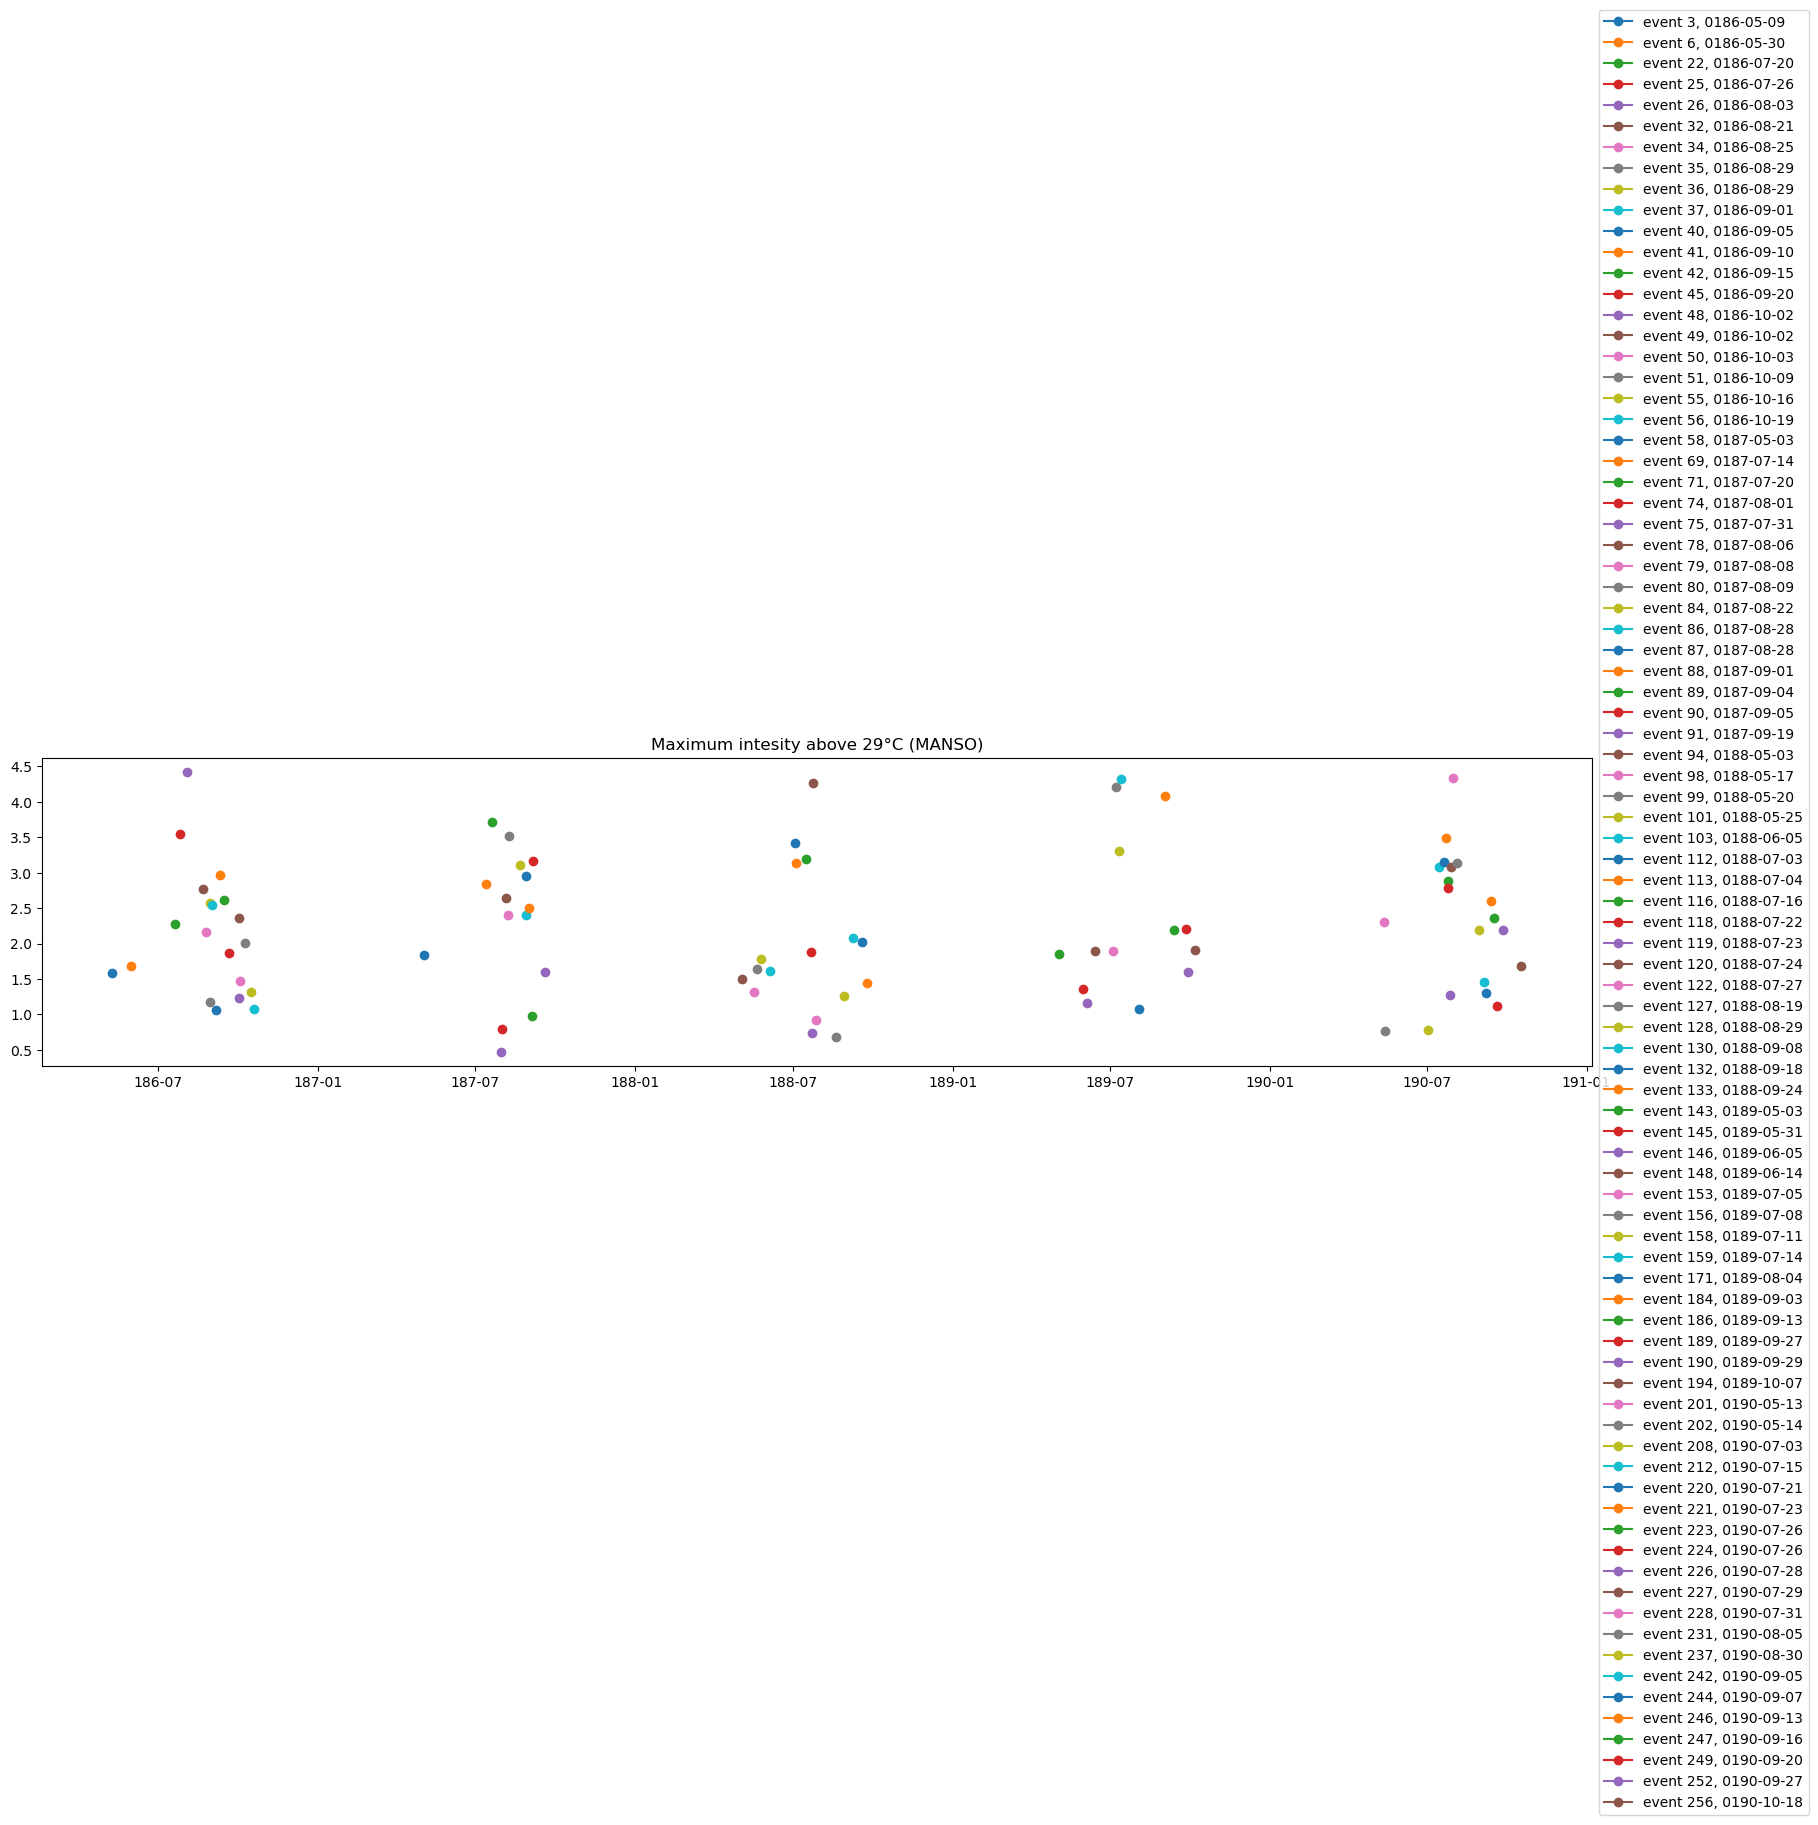

In [16]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(20, 4))

# Generate a colormap based on the number of data points
cmap = plt.get_cmap('tab20b')
colors = cmap(np.linspace(0, 1, len(manso['intensity_mean'].values)))

# Plot each point with a different color from the colormap
for i in range(len(manso['intensity_mean'].values)):
    plt.plot(manso.date[i][0], max_intensity_global[i], marker='o', label=f'event {manso.id[i]}, {manso.date[i][0]}')

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title(f'Maximum intesity above 29°C ({mansoname})')
plt.show()


In [17]:
areaplot_region_sum = []
for i in range(len(manso['area'].values)):
    areaplot_region_sum += [(manso['area'].values[i]).sum()]

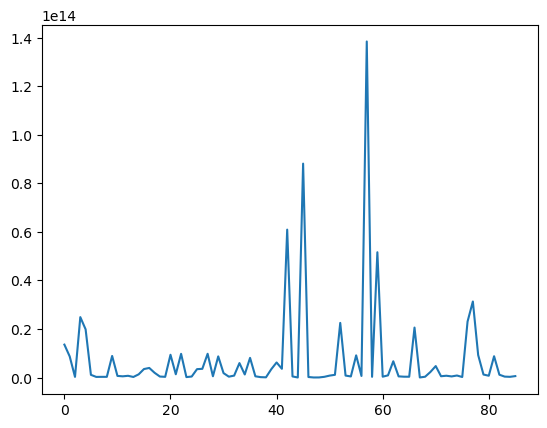

In [18]:
plt.plot(areaplot_region_sum)